In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load the data 
ECG=np.loadtxt('../data/ECGu.txt')

In [5]:
#look at the data
print (ECG)
print (ECG.shape)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)


In [6]:
# create a time vector t   at the same lenght as ECG and with a sampling rate of of 1000hz
fs=1000 # sampling rate
t= np.arange(0, ECG.shape[0])/fs
print (t)

[0.000e+00 1.000e-03 2.000e-03 ... 6.497e+00 6.498e+00 6.499e+00]


In [7]:
# rescale the ecg to mv knowing that the conversion is 1024 micro volt per unit 
ECG = ECG*1024/1000 #convert to mv

analog_to_digital_conversion_gain=1024 #microvolts per unit 
microvolts_to_mv=1000
ECG= ECG*analog_to_digital_conversion_gain/microvolts_to_mv #convert to mv

Text(0.5, 0, 'Time (s)')

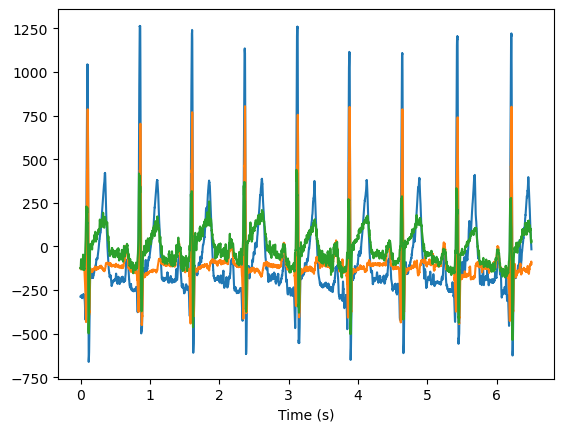

In [8]:
#plot the ECG data as a function of time t 
plt.plot(t,ECG)
plt.xlabel('Time (s)')

In [7]:
# Divide the 3 samples of ECG into 3 leads
lead1 = ECG[:, 0]
lead2 = ECG[:, 1]
lead3 = ECG[:, 2]

print("Lead 1:", lead1)
print("Lead 2:", lead2)
print("Lead 3:", lead3)

Lead 1: [-288.3584   -288.3584   -288.3584   ...   -4.194304   -9.437184
  -16.777216]
Lead 2: [-124.780544 -124.780544 -123.731968 ...  -87.031808  -92.274688
 -100.663296]
Lead 3: [-124.780544 -124.780544 -126.877696 ...   22.020096   32.505856
   34.603008]


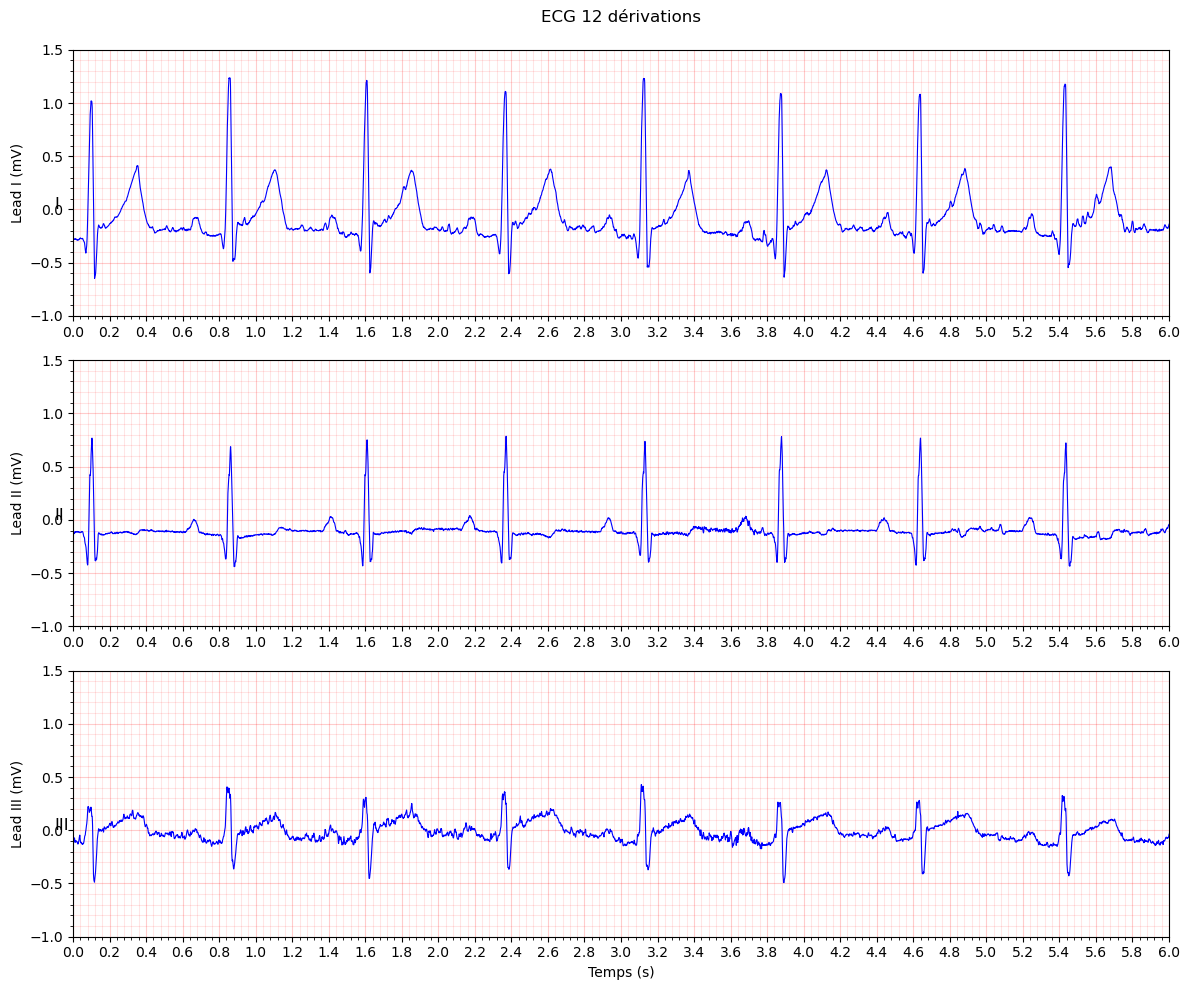

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('../data/ECGu.txt')
ECG1 = data[:, 0]  # Lead I
ECG2 = data[:, 1]  # Lead II
ECG3 = data[:, 2]  # Lead III

# Conversion in mV
ECG1 = ECG1 * 0.001024
ECG2 = ECG2 * 0.001024
ECG3 = ECG3 * 0.001024

# Time vector 
fs = 1000  # Fréquence d'échantillonnage
t = np.arange(0, len(ECG1))/fs

# Configuration of global style 
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), facecolor='#FFFFFF') 

# Configuration for all 3 graphs
for ax in [ax1, ax2, ax3]:
    # Major grid (5mm)
    ax.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    # Minor grid (1mm)
    ax.grid(True, which='minor', color='r', linestyle='-', alpha=0.1)
    ax.minorticks_on()
    # Configuration of ticks
    ax.set_xticks(np.arange(0, 7, 0.2))  # Graduations principales tous les 0.2s
    ax.set_xticks(np.arange(0, 7, 0.04), minor=True)  # Graduations secondaires tous les 0.04s
    ax.set_yticks(np.arange(-1, 1.6, 0.5))  # Graduations principales tous les 0.5mV
    ax.set_yticks(np.arange(-1, 1.6, 0.1), minor=True)  # Graduations secondaires tous les 0.1mV
    # Couleur de fond
    ax.set_facecolor('#FFFFFF')  # Fond blanc


# (Lead I)
ax1.plot(t, ECG1, 'b-', linewidth=0.8)
ax1.set_ylabel('Lead I (mV)')
ax1.set_title('ECG 12 dérivations', pad=20)
ax1.set_ylim(-1, 1.5)
ax1.text(-0.1, 0, 'I', fontsize=12)
ax1.set_xlim(0, 6)

# (Lead II)
ax2.plot(t, ECG2, 'b-', linewidth=0.8)
ax2.set_ylabel('Lead II (mV)')
ax2.set_ylim(-1, 1.5)
ax2.text(-0.1, 0, 'II', fontsize=12)
ax2.set_xlim(0, 6)

# (Lead III)
ax3.plot(t, ECG3, 'b-', linewidth=0.8)
ax3.set_xlabel('Temps (s)')
ax3.set_ylabel('Lead III (mV)')
ax3.set_ylim(-1, 1.5)
ax3.text(-0.1, 0, 'III', fontsize=12)
ax3.set_xlim(0, 6)

plt.tight_layout()
plt.show()
